# Portfolio Optimization using Efficient Frontier

Portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.

Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.

MPT encourages diversification of assets. It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.

<img src="expected return formula.png">

<h4 align="center">Portfolio Variance</h4> 
<img src="portfolio variance formula.png">

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [3]:
#list of stocks in portfolio
stocks = ['AAPL','AMZN','MSFT','GOOGL']

In [4]:
#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']
data.sort_index(inplace=True)

In [5]:
#convert daily stock prices into daily returns
returns = data.pct_change()

#### Portfolio variance = $ w_{12} * {\sigma}_{12} + w_{22} * {\sigma}_{22} + 2 * w_{1}w_{2}Cov_{1,2} $

w - weight of asset

Variance - $ \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2} $

Covariance - Cov$_{xy} = \frac {\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})} {N} $

In [6]:
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [7]:
#set number of runs of random portfolio weights
num_portfolios = 25000

In [32]:
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['Return','Standard Deviation','Sharpe Ratio',stocks[0],stocks[1],stocks[2],stocks[3]])

<h4 align="center">Sharpe Ratio</h4> 
<img src="sharpe ratio formula.png">

<img src="sharpe ratio 2 formula.png">

In [34]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe Ratio'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['Standard Deviation'].idxmin()]

## Efficient frontier

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

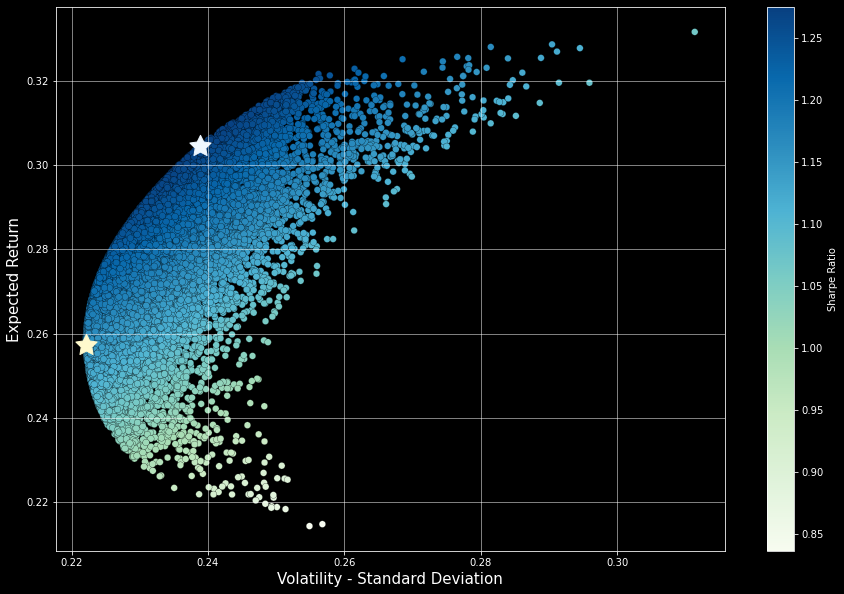

In [39]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
plt.grid(color='white', linewidth=0.5,linestyle='-')
plt.scatter(results_frame['Standard Deviation'],results_frame['Return'],c=results_frame['Sharpe Ratio'],cmap='GnBu', 
            s=45, alpha=1, edgecolor='black',linewidths=0.25)
plt.xlabel('Volatility - Standard Deviation', fontsize=15)
plt.ylabel('Expected Return', fontsize=15)
plt.colorbar(label = 'Sharpe Ratio')

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='aliceblue',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='lemonchiffon',s=500)
plt.show();

### Maximum Sharpe Ratio Portfolio

In [22]:
print(max_sharpe_port.to_string())

ret       0.306772
stdev     0.240557
sharpe    1.275261
AAPL      0.445847
AMZN      0.373889
MSFT      0.179722
GOOGL     0.000542


### Minimum Variance Portfolio

In [23]:
print(min_vol_port.to_string())

ret       0.257508
stdev     0.222105
sharpe    1.159397
AAPL      0.228218
AMZN      0.096965
MSFT      0.359577
GOOGL     0.315240


***